In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import os

In [2]:
archivo = fits.open('TCampob278.fits')
archivo1 = fits.open('PVariablesb278.fits')
HJD=archivo[1].data
Error=archivo1[4].data
Ks=archivo1[3].data
archivo1.info()

Filename: PVariablesb278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  KS_ALE        1 ImageHDU         7   (1260548,)   float64   
  2  EKS_ALE       1 ImageHDU         8   (66, 100000)   float64   
  3  KS_PV         1 ImageHDU         8   (66, 103)   float64   
  4  EKS_PV        1 ImageHDU         8   (66, 103)   float64   


In [4]:
print(len(archivo1[1].data))

1260548


In [3]:
print(Error[-1])
print(Ks[-1])
print(HJD)

[0.061 0.052 0.048 0.046 0.054 0.057 0.052 0.082 0.06  0.054 0.05  0.087
 0.096 0.078 0.055 0.052 0.051 0.056 0.054 0.05  0.053 0.073 0.054 0.085
 0.051 0.056 0.06  0.07  0.063 0.061 0.059 0.061 0.069 0.067 0.06  0.057
 0.054 0.057 0.065 0.094 0.057 0.12  0.063 0.081 0.066   nan 0.069 0.076
 0.06  0.11  0.071 0.091 0.067   nan 0.061 0.076 0.084 0.098 0.069   nan
 0.105 0.074   nan   nan   nan   nan]
[15.198 15.031 14.989 14.962 15.094 15.074 15.023 15.581 15.176 15.083
 15.007 15.651 15.665 15.462 15.061 14.978 15.011 15.126 15.044 14.993
 15.122 15.405 15.026 15.579 14.981 15.089 15.138 15.314 15.244 15.224
 15.134 15.206 15.323 15.295 15.13  15.061 15.036 15.127 15.183 15.661
 15.096 15.709 15.177 15.373 15.219    nan 15.189 15.319 15.102 15.704
 15.173 15.405 15.116    nan 15.073 15.262 15.118 15.493 15.167    nan
 15.72  15.2      nan    nan    nan    nan]
[2455820.56199467 2455839.52441602 2456507.49557602 2456484.67874153
 2456509.54330404 2455806.59149225 2456020.78712759 245611

In [25]:
def eliminar_nan(error, ks, HJD):
    indices_validos = ~np.isnan(ks)
    error_filtrado = [error[i] for i in range(len(ks)) if indices_validos[i]]
    ks_filtrado = [ks[i] for i in range(len(ks)) if indices_validos[i]]
    HJD_filtrado = [HJD[i] for i in range(len(ks)) if indices_validos[i]]
    return error_filtrado, ks_filtrado, np.round(HJD_filtrado,8)

ks_nan=[]
error_nan=[]
HJD_na=[]
y=0
while y<len(Ks):
    error_filtrado, ks_filtrado, HJD_filtrado = eliminar_nan(Error[y], Ks[y], HJD-2400000)
    ks_nan.append(ks_filtrado)
    error_nan.append(error_filtrado)
    HJD_na.append(HJD_filtrado)
    y+=1
print(error_nan[-1])
print(ks_nan[-1])
print(HJD_na[-1])

[0.061, 0.052, 0.048, 0.046, 0.054, 0.057, 0.052, 0.082, 0.06, 0.054, 0.05, 0.087, 0.096, 0.078, 0.055, 0.052, 0.051, 0.056, 0.054, 0.05, 0.053, 0.073, 0.054, 0.085, 0.051, 0.056, 0.06, 0.07, 0.063, 0.061, 0.059, 0.061, 0.069, 0.067, 0.06, 0.057, 0.054, 0.057, 0.065, 0.094, 0.057, 0.12, 0.063, 0.081, 0.066, 0.069, 0.076, 0.06, 0.11, 0.071, 0.091, 0.067, 0.061, 0.076, 0.084, 0.098, 0.069, 0.105, 0.074]
[15.198, 15.031, 14.989, 14.962, 15.094, 15.074, 15.023, 15.581, 15.176, 15.083, 15.007, 15.651, 15.665, 15.462, 15.061, 14.978, 15.011, 15.126, 15.044, 14.993, 15.122, 15.405, 15.026, 15.579, 14.981, 15.089, 15.138, 15.314, 15.244, 15.224, 15.134, 15.206, 15.323, 15.295, 15.13, 15.061, 15.036, 15.127, 15.183, 15.661, 15.096, 15.709, 15.177, 15.373, 15.219, 15.189, 15.319, 15.102, 15.704, 15.173, 15.405, 15.116, 15.073, 15.262, 15.118, 15.493, 15.167, 15.72, 15.2]
[55820.56199467 55839.52441602 56507.49557602 56484.67874153
 56509.54330404 55806.59149225 56020.78712759 56115.59726817
 571

In [21]:
serie = ks_nan[0]
erro = error_nan[0]
hjd = HJD_na[0]

# Definir el nombre del archivo de texto
nombre_archivo = "Datosb278 "

# Escribir los datos en el archivo de texto
with open(nombre_archivo, "w") as archivo:
    for h, s, e in zip(hjd, serie, erro):
        archivo.write("{:<15} {:<8} {:<6}\n".format(h, s, e))

In [ ]:
x=0
while x<len(ks_nan):
    serie = ks_nan[x]
    erro = error_nan[x]
    hjd = HJD_na[x]

    # Definir el nombre del archivo de texto
    nombre_archivo = "Datosb278"+str(x)+".txt"

    with open(nombre_archivo, "w") as archivo:
        for h, s, e in zip(hjd, serie, erro):
            archivo.write("{:<10} {:<10} {:<10}\n".format(h, s, e))
    x+=1
print("hecho")

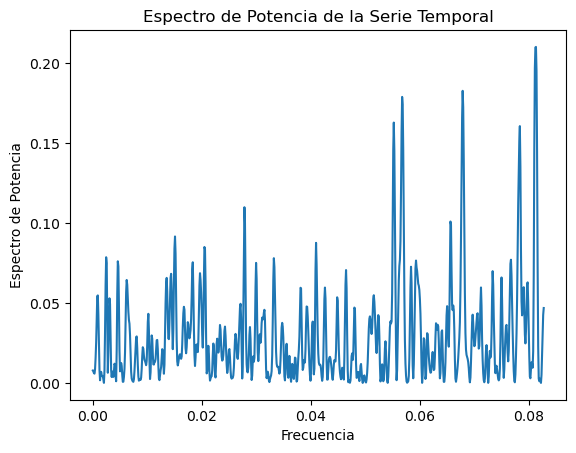

In [5]:
S=ks_nan[19]
Date=HJD_na[19]
# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(Date, S).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
# Guarda la gráfica en un archivo
plt.savefig('serie_potencias19_b278.png')
#metodo de analisis de varianzas
plt.show()

In [6]:
# Definir el número de picos que deseas identificar
n_picos = 50 # Por ejemplo, para identificar los tres picos más prominentes

# Encontrar los índices de los picos en el espectro de potencia
indices_picos = np.argpartition(power, -n_picos)[-n_picos:]
indices_picos_ordenados = indices_picos[np.argsort(-power[indices_picos])]

# Obtener las frecuencias y potencias de los picos
frecuencias_picos = frequency[indices_picos_ordenados]
potencias_picos = power[indices_picos_ordenados]

# Calcular los períodos correspondientes a las frecuencias de los picos
periodos_picos = 1 / frecuencias_picos

# Imprimir los períodos correspondientes a los picos
for i, periodo in enumerate(periodos_picos):
    print(f"Pico {i+1}: Periodo = {periodo:.2f} días, Potencia = {potencias_picos[i]:.2f}")


Pico 1: Periodo = 12.30 días, Potencia = 0.21
Pico 2: Periodo = 12.32 días, Potencia = 0.21
Pico 3: Periodo = 12.33 días, Potencia = 0.20
Pico 4: Periodo = 12.29 días, Potencia = 0.19
Pico 5: Periodo = 14.74 días, Potencia = 0.18
Pico 6: Periodo = 17.62 días, Potencia = 0.18
Pico 7: Periodo = 17.59 días, Potencia = 0.17
Pico 8: Periodo = 14.72 días, Potencia = 0.17
Pico 9: Periodo = 14.76 días, Potencia = 0.17
Pico 10: Periodo = 18.11 días, Potencia = 0.16
Pico 11: Periodo = 12.77 días, Potencia = 0.16
Pico 12: Periodo = 17.65 días, Potencia = 0.16
Pico 13: Periodo = 12.78 días, Potencia = 0.15
Pico 14: Periodo = 12.35 días, Potencia = 0.15
Pico 15: Periodo = 18.14 días, Potencia = 0.15
Pico 16: Periodo = 17.56 días, Potencia = 0.15
Pico 17: Periodo = 18.08 días, Potencia = 0.14
Pico 18: Periodo = 12.27 días, Potencia = 0.14
Pico 19: Periodo = 14.70 días, Potencia = 0.14
Pico 20: Periodo = 12.75 días, Potencia = 0.13
Pico 21: Periodo = 12.80 días, Potencia = 0.13
Pico 22: Periodo = 14.

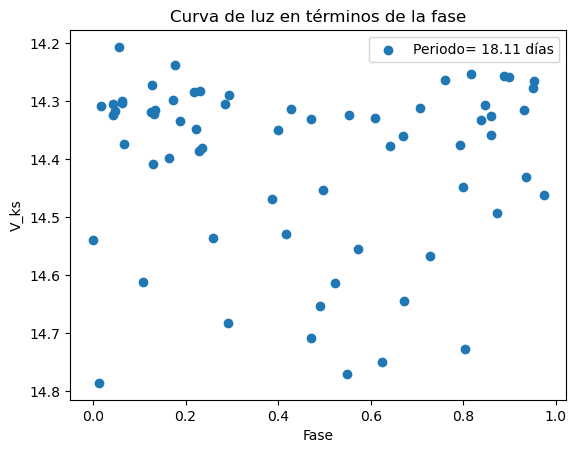

In [7]:
P=18.11
t_0 = Date[0]

# 3. Calcular la fase para cada punto de tus datos
fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
plt.scatter(fase, S)
plt.xlabel('Fase')
plt.ylabel('V_ks')
# Invertir el eje y
plt.gca().invert_yaxis()
plt.title('Curva de luz en términos de la fase')
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(P)])
# Guarda la gráfica en un archivo
plt.savefig('Curva19_b278.png')
plt.show()